In [2]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.utils import shuffle

In [3]:
TF_ENABLE_ONEDNN_OPTS=1
home_dir = os.getenv("home_BA885")

# Assign home_dir as a local directory to use when saving data to disk.

# Machine Learning with TensorFlow/Keras

Let us first review the basics of machine learning with TensorFlow. The goal is for you to feel comfortable with modifying or completely breaking apart from keras should the need arise. First, we will build a simple model with Keras and review the basic steps which we will then implement directly with TensorFlow.

We will use the MNIST dataset as it is readily available and it does not require a lot of resources.

In [4]:
# Load the MNIST dataset.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Rescale the data
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

# You can also choose to flatten the data unless you wish to build a convolutional model
#train_images = train_images.reshape((60000, 28 * 28))
#test_images = test_images.reshape((10000, 28 * 28))

## A simple model with Keras

First, let us review the model building process in keras. We simply need to use a few building blocks (layers, model, compile, fit, evaluate) to build, train and evaluate the performance of a simple model.

We will use the functional API instead of keras.Sequential to build our models since the functional API is much more flexible. 

To train the model, we need to compile it by choosing an optimizer (adam, rmsprop, ...), the loss function (mse, crossentropy, ...) as well as any metrics to evaluate the performance of the model (mae, accuracy, ...). Here we will use 'rmsprop' as the optimizer, 'sparse_categorical_entropy' as the loss function and 'accuracy' as the metric.

Recall that 'categorical_crossentropy' loss function compares one-hot encodings while 'sparse_categorical_crossentropy' compares a one-hot encoding with an integer.

Model: "mnist0_keras"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


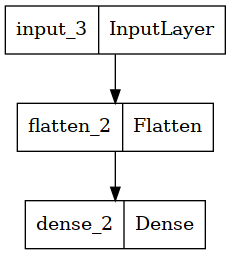

In [11]:
# A simple classification model with no hiddel layers
mnist0_keras_input = layers.Input(shape=(28,28,))
mnist0_keras_flatten = layers.Flatten()(mnist0_keras_input)
mnist0_keras_output = layers.Dense(10, activation="softmax")(mnist0_keras_flatten)

mnist0_keras_model = keras.Model(inputs = mnist0_keras_input,
                        outputs = mnist0_keras_output,
                        name="mnist0_keras")

# Print a summary of our model
mnist0_keras_model.summary()

# Plot the DAG for this model
keras.utils.plot_model(mnist0_keras_model, to_file=home_dir+'/Tutorials/tmp/mnist0_keras.png')

In [12]:
optim0 = "rmsprop"
loss0 = "sparse_categorical_crossentropy"
metrics0 = ["accuracy"]

mnist0_keras_model.compile(optimizer = optim0,
                           loss = loss0,
                           metrics = metrics0
                          )

In [13]:
# Set history = model.fit in order to store the loss and accuracy of the model after each epoch.
# You can also utilize callbacks such as early stoppping. The EarlyStopping callback below keeps
# record of the weights and validation accuracy after each epoch. Once the validation accuracy 
# stops improving for a few epochs in a row, the callback stops the training and restores the weights
# with the highest validation accuracy.

callb0 = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=3,
                                       restore_best_weights=True
                                      )

history = mnist0_keras_model.fit(train_images,
                                 train_labels,
                                 validation_split = 0.2,
                                 epochs = 30,
                                 batch_size = 256,
                                 callbacks = callb0
                                )

Epoch 1/30
188/188 [==============================] - 3s 15ms/step - loss: 0.8537 - accuracy: 0.7956 - val_loss: 0.4344 - val_accuracy: 0.8898
Epoch 2/30
188/188 [==============================] - 2s 11ms/step - loss: 0.4029 - accuracy: 0.8928 - val_loss: 0.3367 - val_accuracy: 0.9101
Epoch 3/30
188/188 [==============================] - 2s 8ms/step - loss: 0.3434 - accuracy: 0.9064 - val_loss: 0.3093 - val_accuracy: 0.9157
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3188 - accuracy: 0.9119 - val_loss: 0.2957 - val_accuracy: 0.9178
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3047 - accuracy: 0.9159 - val_loss: 0.2870 - val_accuracy: 0.9200
Epoch 6/30
188/188 [==============================] - 1s 7ms/step - loss: 0.2953 - accuracy: 0.9176 - val_loss: 0.2800 - val_accuracy: 0.9222
Epoch 7/30
188/188 [==============================] - 2s 8ms/step - loss: 0.2885 - accuracy: 0.9193 - val_loss: 0.2753 - val_accuracy: 0.9241
Epoc

In [14]:
# Here is the data stored in history:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

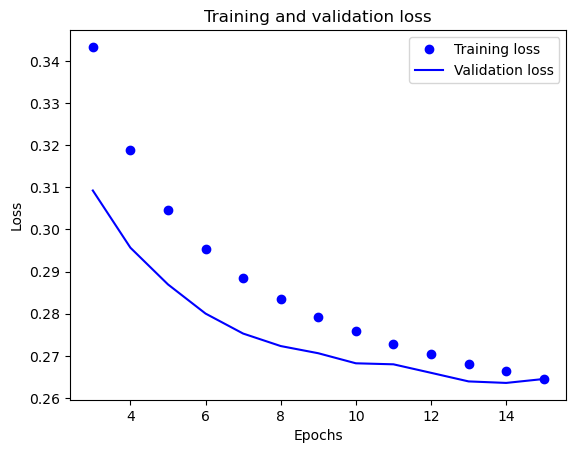

In [15]:
# We can plot the loss or accuracy of the training and validation datasets to monitor overfitting.

history_dict = history.history
loss_values = history_dict["loss"]
start = 3
val_loss_values = history_dict["val_loss"]
epochs = range(start, len(loss_values) + 1)
plt.plot(epochs, loss_values[start-1:], "bo", label="Training loss")
plt.plot(epochs, val_loss_values[start-1:], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [98]:
# After the model is adequately trained we can evaluate its performance on the test dataset.

mnist0_keras_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2711 - accuracy: 0.9238


[0.27110499143600464, 0.923799991607666]

In [37]:
# To run inference with this model we use model.predict
i = 2
p = mnist0_keras_model.predict(np.array([test_images[i]]))
print('The true label is : {} \nThe model predicts: {}'.format(test_labels[i],np.argmax(p)))

1/1 [==============================] - 0s 44ms/step
The true label is : 1 
The model predicts: 1


## A simple model with TensorFlow

Now we would like to build and train the same model with Tensorflow. To do so, recall that to build and train such a model we need the following

1. Feed Forward: Compute the output of the model given an input.
2. Loss function: A differentiable function that compares the output of the model with the provided label.
2. Back Propagation: Compute the derivatives of the loss function with respect to the weights.
3. Gradient Descent: A mechanism that updates the weights in search of a minimum of the loss function.

In [38]:
# Recall the shape of our input data
train_images.shape

(60000, 28, 28)

In [107]:
# Specify the dimensions of the input and output for the model
# (We shall flatten the images into vectors)
input_dim = 28 * 28
output_dim = 10

# Initiae the weights for our model
w = tf.Variable(tf.random.normal([input_dim, output_dim]), name='w')
b = tf.Variable(tf.zeros([output_dim], dtype=tf.float32), name = 'b')

# Define the model as a function using TensorFlow operations
def mnist_simple_model(x):
    y = tf.matmul(tf.reshape(x,[-1,28*28]), w) + b
    return tf.nn.softmax(y)

# Define the accuracy metric to evaluate model performance
def simple_accuracy(x, y_true):
    y_true = tf.cast(y_true, tf.int32)
    y = tf.math.argmax(mnist_simple_model(x), axis=1, output_type=tf.int32)
    total = tf.size(y_true)
    count = total - tf.math.count_nonzero(y - y_true, dtype=tf.int32)
    return tf.divide(count, total)

# Split the data into training and validation datasets
x_train = train_images[0:49920]
y_train = train_labels[0:49920]

x_valid = train_images[49920:]
y_valid = train_labels[49920:]

In [109]:
# Specify training parameters
learning_rate = 1.2
epochs = 201
batch_size = 256
history = {'train_loss':[], 'val_loss':[]}

# Write a training loop for the model which runs over the batches for the specified number of epochs
for i in range(epochs):
    for j in range(len(x_train)//batch_size):
        # Select batch from training data
        x = x_train[256*j: 256*(j+1)]
        y = y_train[256*j: 256*(j+1)]
        # Use GradientTape to keep track of the gradients
        with tf.GradientTape() as tape:
            tape.watch((w, b))
            # Compute the prediction as well as the loss (MSE)
            predictions = mnist_simple_model(x)
            # Remember to convert the true values into one-hot encoding
            loss = tf.reduce_mean(tf.square(predictions - tf.one_hot(y,10)))
            # GradientTape conveniently calculates the gadient for us
            grad_loss = tape.gradient(loss, [w, b])
            # Update the weights
            w = w - learning_rate*grad_loss[0]
            b = b - learning_rate*grad_loss[1]
        #
        # Move to the next batch
        #
    # Compute loss on validation data
    train_loss = tf.reduce_mean(tf.square(mnist_simple_model(x_train) - tf.one_hot(y_train,10)))
    val_loss = tf.reduce_mean(tf.square(mnist_simple_model(x_valid) - tf.one_hot(y_valid,10)))
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    val_accuracy = simple_accuracy(x_valid, y_valid)
    if i%10 == 0:
        tf.print('epoch({}): validation_loss = {}, validation accuracy = {}'.format(i,val_loss,val_accuracy))
    # Shuffle the training data after each epoch
    x_train, y_train = shuffle(x_train, y_train)

epoch(0): validation_loss = 0.146878182888031, validation accuracy = 0.16865079365079366
epoch(10): validation_loss = 0.08111492544412613, validation accuracy = 0.5244047619047619
epoch(20): validation_loss = 0.07142385095357895, validation accuracy = 0.5814484126984127
epoch(30): validation_loss = 0.06384877115488052, validation accuracy = 0.6178571428571429
epoch(40): validation_loss = 0.055814556777477264, validation accuracy = 0.6639880952380952
epoch(50): validation_loss = 0.052464812994003296, validation accuracy = 0.6821428571428572
epoch(60): validation_loss = 0.05046094208955765, validation accuracy = 0.6923611111111111
epoch(70): validation_loss = 0.04899226129055023, validation accuracy = 0.6994047619047619
epoch(80): validation_loss = 0.047520268708467484, validation accuracy = 0.7046626984126985
epoch(90): validation_loss = 0.03711423650383949, validation accuracy = 0.7625
epoch(100): validation_loss = 0.03275778517127037, validation accuracy = 0.7883928571428571
epoch(110

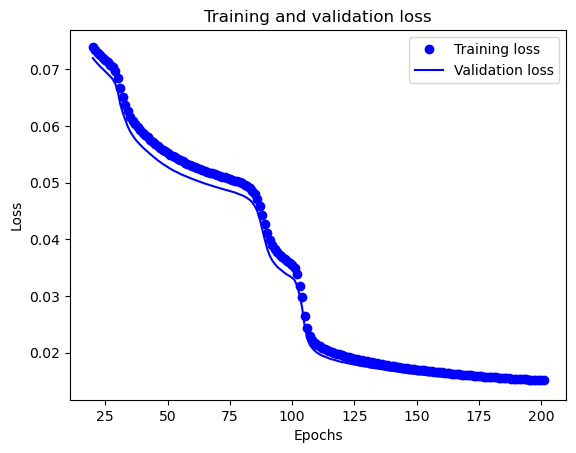

In [116]:
# We can plot the loss or accuracy of the training and validation datasets to monitor overfitting.

start = 20
loss_values = history["train_loss"]
val_loss_values = history["val_loss"]
epochs = range(start, len(loss_values) + 1)
plt.plot(epochs, loss_values[start-1:], "bo", label="Training loss")
plt.plot(epochs, val_loss_values[start-1:], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [101]:
# After the model is adequately trained we can evaluate its performance on the test dataset.

simple_accuracy(test_images, test_labels)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9083>

In [106]:
# To run inference with this model we can just call the function
i = 0
p = mnist_simple_model(np.array([test_images[i]]))
print('The true label is : {} \nThe model predicts: {}'.format(test_labels[i],np.argmax(p)))

The true label is : 7 
The model predicts: 7


###

It is evident that while the model and optimizer we built from scratch is completely transparent and customizable, it is significantly slower to train.

You may be able to speed up the training by tuning the hyperparameters and I encourage you to experiment with this. For instance, you can try implementing a dynamic learning rate which starts at a relatively high value and is progressively lowered as the model is trained.

However, to close the gap we would need to implement a more sophisticated training loop and include concepts such as momentum. In practice, the majority of deep learning models can be implemented purely using Keras, perhaps with minimal modifications. Such modifications can be implemented via subclassing which we will cover in another tutorial.

## Exercises

- I encourage you to experiment and familiarize yourself with various optimizers (adam, rmsprop, ...) and their hyperparameters (learning rate, momentum, ...) to better appreciate their utilization.

- You can also implement models with different architectures starting with adding hidden layers to the models presented here.

- Lastly, you can try incorporating momentum into the training loop. Schematically, this is what the update rule with momentum should look like:

    w(j+1) = w(j) - learning_rate x d_wloss(j) - momentum * d_wloss(j-1)

    where j is the number of steps into an epoch (i.e. batch number). You can look here 
    https://optimization.cbe.cornell.edu/index.php?title=Momentum
    to gain a better understanding of the benefits of adding momentum to stochastic gradient descent.